In [20]:
%%capture
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from surv_optimizer.objective_functions.TwoStateCoxObjectiveFunction import TwoStateCoxObjectiveFunction
from surv_optimizer.objective_functions.TwoStateCoxObjectiveFunction import TwoStateCoxObjectiveFunction
from surv_optimizer.calculators.TwoStateCovariateContribution import TwoStateCovariateContribution
from surv_optimizer.calculators.TwoStateEventRisk import TwoStateEventRisk
from surv_optimizer.data.DatasetManager import DatasetManager
from surv_optimizer.Optimizer import Optimizer

np.set_printoptions(suppress=True)

In [3]:
# Initialize DatasetManager
dataset_manager = DatasetManager()

# Get data view for state_from=1 and sorted=True
data_view = dataset_manager.get_dataview(state_from=1, sorted=True)

In [4]:
data_view

,individuals,time,censorship,event_from,event_to,Z_i1,Z_ij1,Z_ij1_filled,event
35,7,0.006768,0,1,2,"[0.18182496720710062, 0.18340450985343382]","[0.1014715428660321, 0.6635017691080558]","[0.1014715428660321, 0.6635017691080558]",1
36,7,0.010485,0,2,1,"[0.18182496720710062, 0.18340450985343382]","[0.16080805141749865, 0.5487337893665861]","[0.16080805141749865, 0.5487337893665861]",0
180,36,0.011134,0,1,2,"[0.005522117123602399, 0.8154614284548342]","[0.3220791655831783, 0.21144800699654465]","[0.3220791655831783, 0.21144800699654465]",1
0,0,0.013733,0,1,2,"[0.3745401188473625, 0.9507143064099162]","[0.6364104112637804, 0.3143559810763267]","[0.6364104112637804, 0.3143559810763267]",1
170,34,0.019455,0,1,2,"[0.07455064367977082, 0.9868869366005173]","[0.7994103989090426, 0.6279003894909078]","[0.7994103989090426, 0.6279003894909078]",1
...,...,...,...,...,...,...,...,...,...
14,2,4.526702,0,1,2,"[0.15601864044243652, 0.15599452033620265]","[0.30087830981676966, 0.2848404943774676]","[0.30087830981676966, 0.2848404943774676]",1
149,29,4.744753,0,1,2,"[0.045227288910538066, 0.32533033076326434]","[0.5203077009037933, 0.7723183917356393]","[0.5203077009037933, 0.7723183917356393]",1
49,9,5.114232,0,1,2,"[0.43194501864211576, 0.2912291401980419]","[0.9636199770892528, 0.8530094554673601]","[0.9636199770892528, 0.8530094554673601]",1
249,49,7.438451,0,1,2,"[0.02541912674409519, 0.10789142699330445]","[0.5021950103312426, 0.5953850173200438]","[0.5021950103312426, 0.5953850173200438]",1


In [24]:
from surv_optimizer.calculators.TwoStateHazard import TwoStateHazard

# Initialize ObjectiveFunction with DatasetManager and data_view
objective_function = TwoStateCoxObjectiveFunction(dataset_manager, data_view)

# Initialize RiskCalculator and CovariateContributionCalculator
risk_calculator = TwoStateEventRisk(dataset_manager, data_view)
covariate_calculator = TwoStateCovariateContribution(dataset_manager, data_view, risk_calculator)

# Set calculators in ObjectiveFunction
objective_function.set_calculators(covariate_calculator, risk_calculator)

# Initialize SurvivalCalculator
survival_calculator = TwoStateHazard(dataset_manager, data_view)
survival_calculator.set_calculators(covariate_calculator, risk_calculator)

# Initialize the Optimizer
optimizer = Optimizer(objective_function, survival_calculator, covariate_calculator)
optimizer.fit(verbose=True)
optimizer.coef_

Optimization Progress:   0%|                                                 | 0/40 [00:00<?, ?it/s]


Iteration 1: Coefficients = [-0.26321148  0.43654885  0.02561531  0.72289215]
Gradient Norm: 10.39976983623787


Optimization Progress:   2%|█                                        | 1/40 [00:02<01:49,  2.82s/it]

Iteration 1, Loss: 445.32646979733664

Iteration 2: Coefficients = [ 0.22481449  0.76628702  0.38130122 -0.0027737 ]
Gradient Norm: 1.7984046269615692


Optimization Progress:   5%|██                                       | 2/40 [00:05<01:48,  2.85s/it]

Iteration 2, Loss: 440.78503211547775

Iteration 3: Coefficients = [0.18022455 0.71992533 0.42199973 0.11693446]
Gradient Norm: 0.10806919270923022


Optimization Progress:   8%|███                                      | 3/40 [00:09<02:06,  3.43s/it]

Iteration 3, Loss: 440.65550052591084

Iteration 4: Coefficients = [0.1862625  0.72248125 0.41924644 0.11975004]
Gradient Norm: 0.007595140508357304


Optimization Progress:  10%|████                                     | 4/40 [00:13<02:13,  3.71s/it]

Iteration 4, Loss: 440.65455828488143

Iteration 5: Coefficients = [0.1862487  0.72246383 0.41985513 0.12002441]
Gradient Norm: 0.0012215782123031064


Optimization Progress:  12%|█████▏                                   | 5/40 [00:18<02:14,  3.85s/it]

Iteration 5, Loss: 440.6545055745577

Iteration 6: Coefficients = [0.18632779 0.72250941 0.41984884 0.12001864]
Gradient Norm: 0.00017265529424560528


Optimization Progress:  12%|█████▏                                   | 5/40 [00:22<02:35,  4.45s/it]

Iteration 6, Loss: 440.6544987517787
Early stopping at iteration 6. No significant improvement in loss.


array([0.18632779, 0.72250941, 0.41984884, 0.12001864])

In [27]:
#event_counts = dataset_manager.get_event_counts(data_view)
#event_counts.iloc[3][0]
survival_calculator.compute_baseline_hazard(optimizer.coef_, verbose=True)

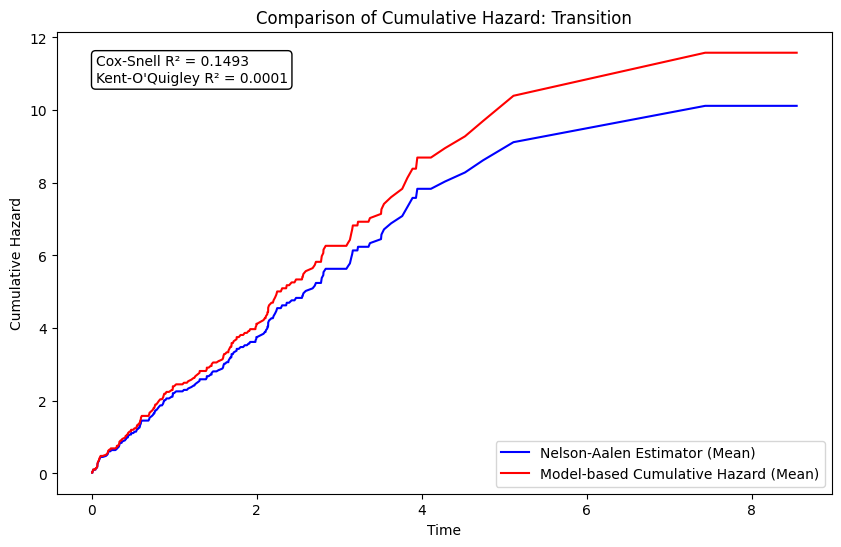

In [28]:
from surv_optimizer.tests.NelsonAalenMultiStateEstimator import NelsonAalenMultiStateEstimator
cumulative_hazard_func =survival_calculator.get_cumulative_hazard_function()
nelson_aalen_estimator = NelsonAalenMultiStateEstimator(cumulative_hazard_func, risk_calculator, dataset_manager, data_view)
nelson_aalen_estimator.compare_cumulative_hazard()

In [ ]:
from surv_optimizer.tests.DynamicSurvivalCrossValidation import DynamicSurvivalCrossValidation
dynamic_validation = DynamicSurvivalCrossValidation(survival_calculator, dataset_manager,data_view)
dynamic_validation.run_cross_validation()

KeyboardInterrupt: 

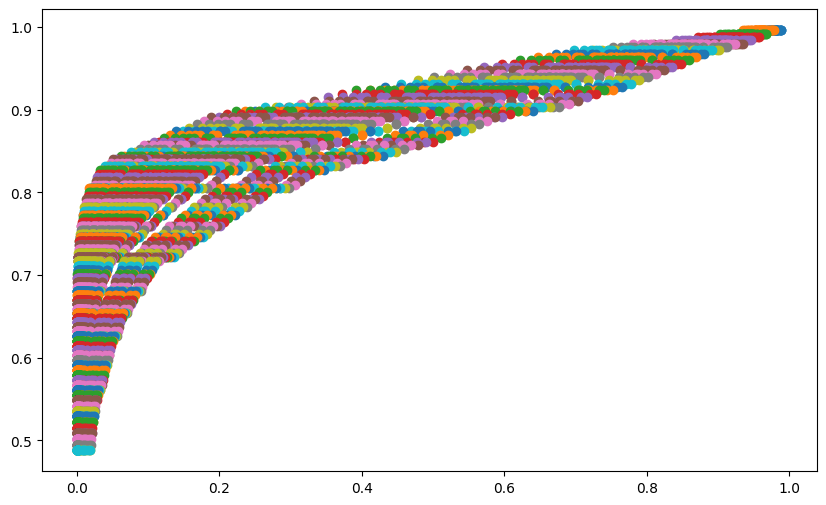

In [67]:
from surv_optimizer.tests.SurvivalCalibration import SurvivalCalibration
survival_calibration = SurvivalCalibration(survival_calculator, dataset_manager,data_view)
survival_calibration.compute_calibration_curve(dataset_manager.get_unique_times())


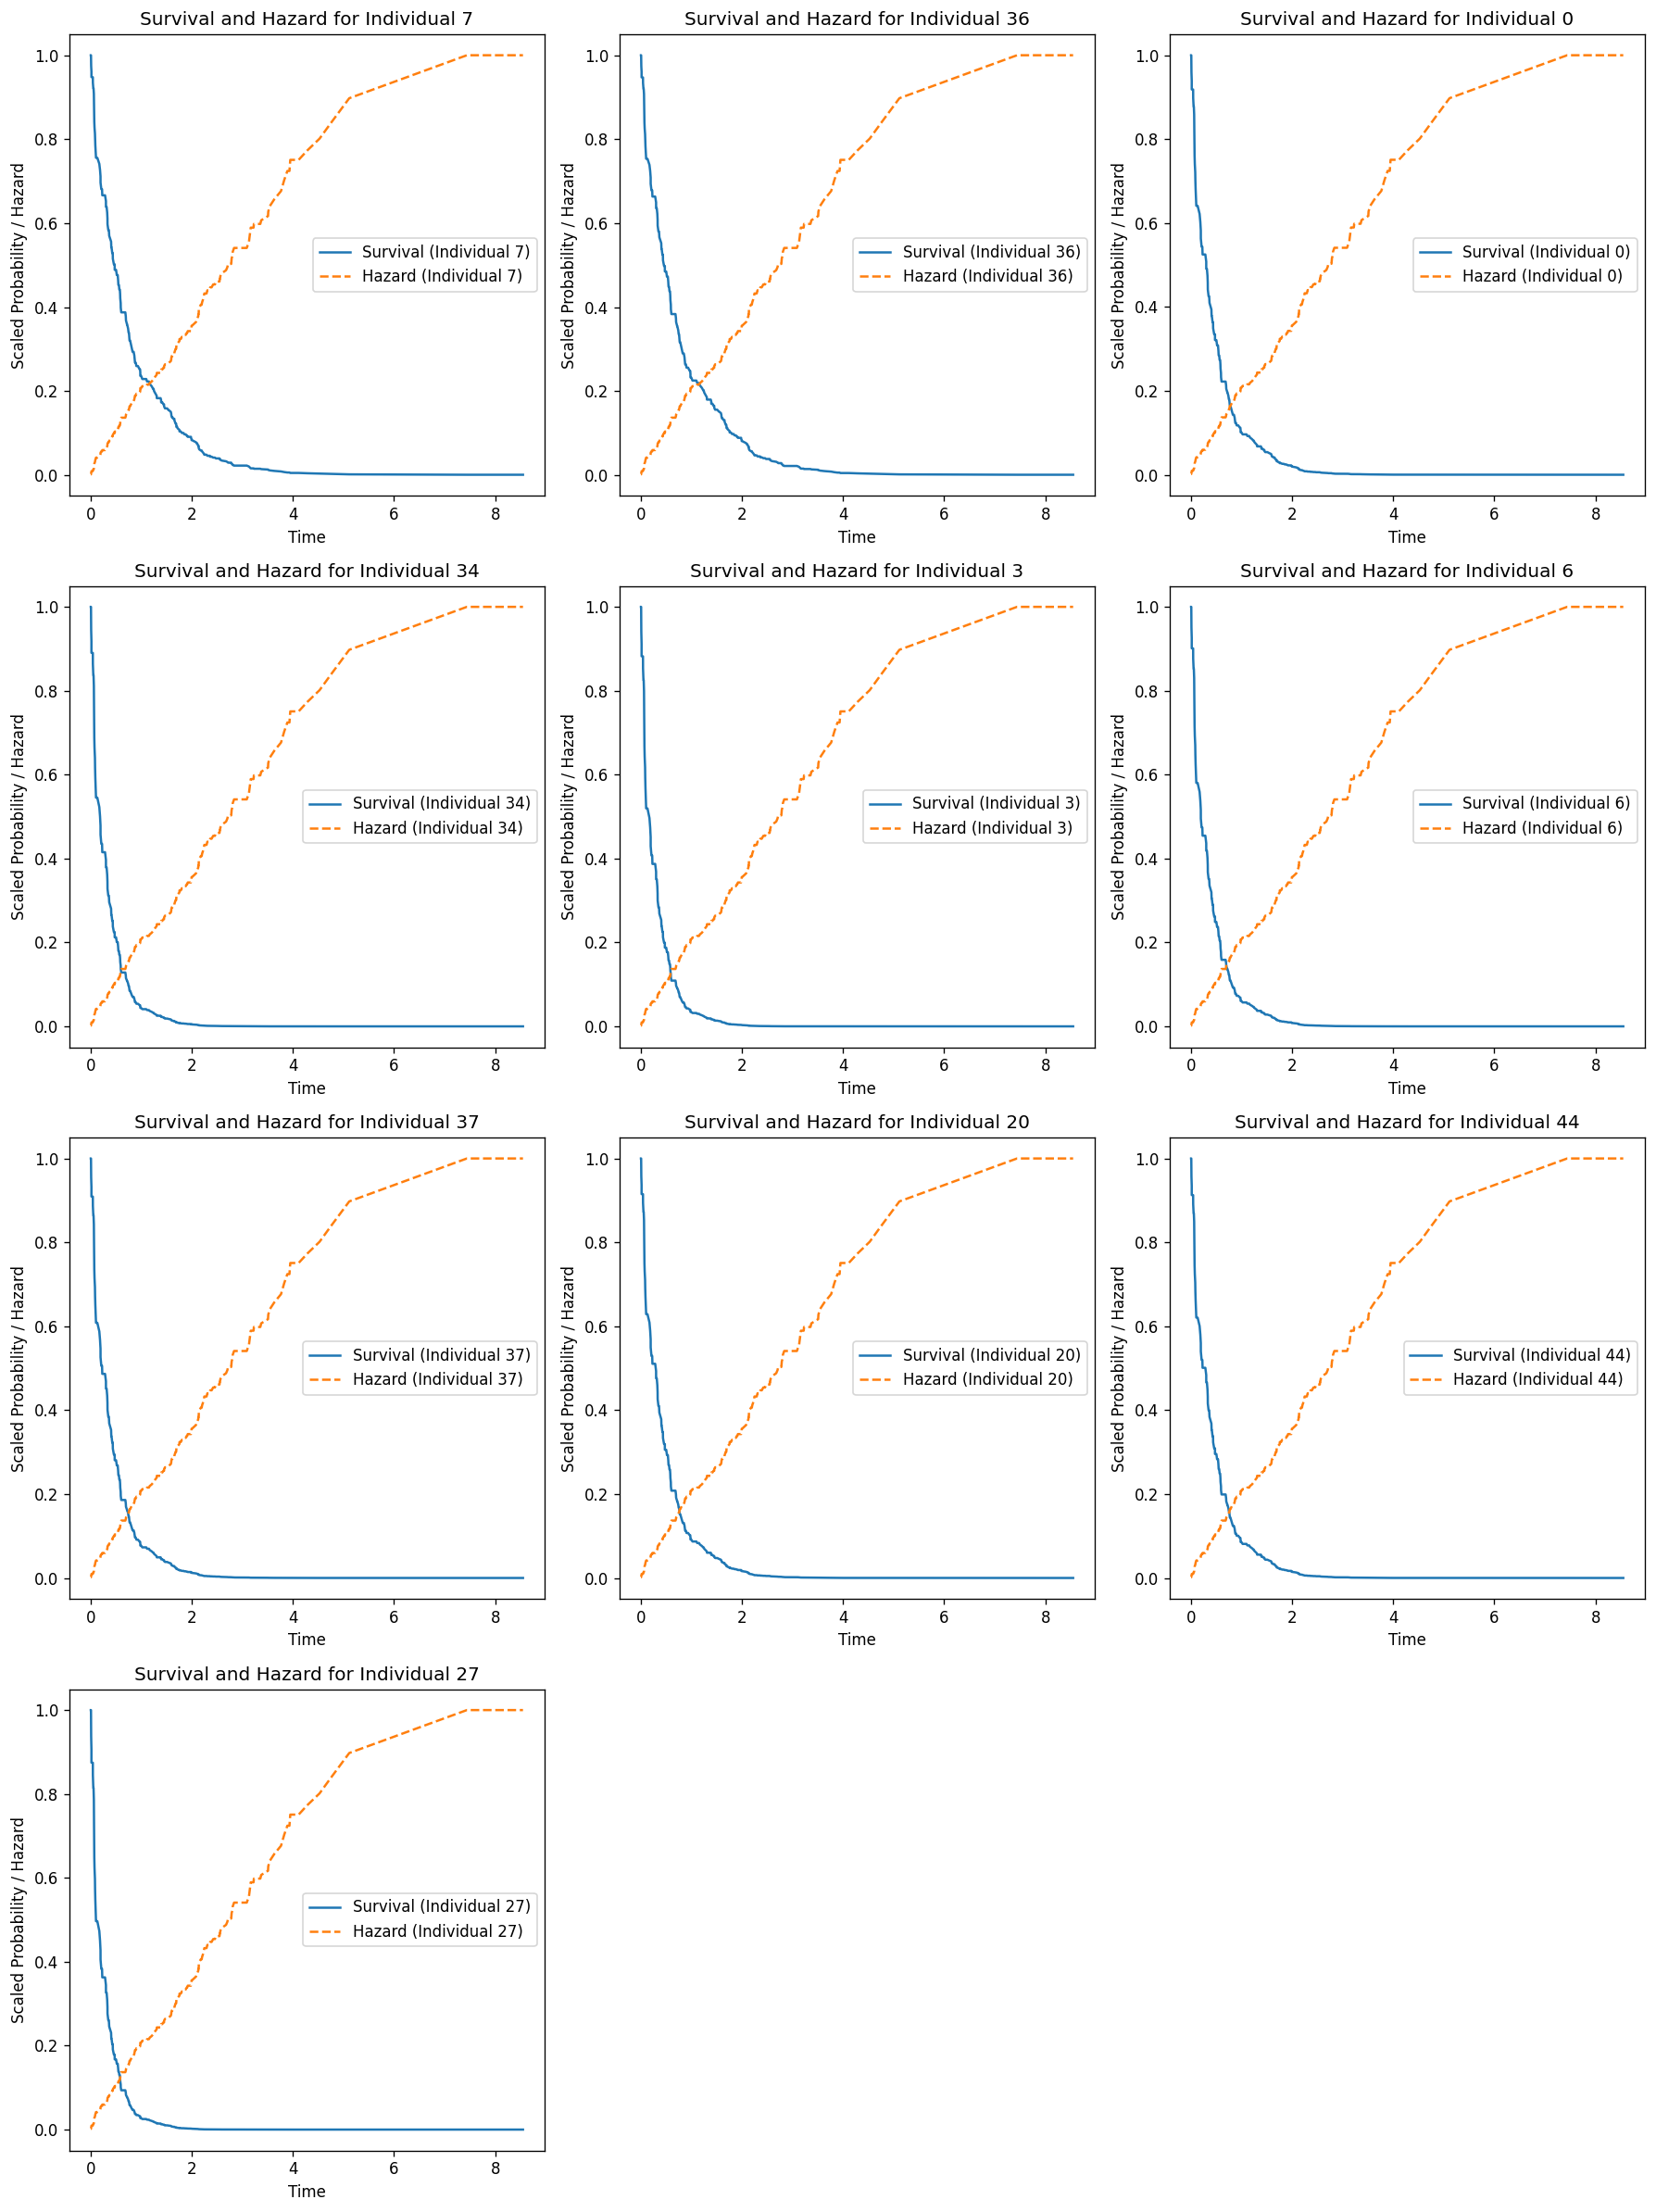

In [29]:
from surv_optimizer.plotting.CoxPlotHelper import CoxPlotHelper
plot_helper = CoxPlotHelper(survival_calculator, optimizer.coef_)
plot_helper.plot_survival_and_hazard()

In [30]:
survival_calculator.calculate_expected_survival_time()

KeyboardInterrupt: 